In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
track_data = pd.read_csv("tracks_features.csv")


In [3]:
track_data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [4]:
#drop columns we don't need
refined_track_data_columns = track_data[["name", "album", "artists", "danceability", 
                                         "speechiness", "acousticness", "instrumentalness", 
                                         "liveness", "valence","energy", "tempo", "duration_ms", "year"]]
refined_track_data_columns.head()

,name,album,artists,danceability,speechiness,acousticness,instrumentalness,liveness,valence,energy,tempo,duration_ms,year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [5]:
renamed_track_data_columns= refined_track_data_columns.rename(columns={"name":"Song Title", "album":"Album Title",
                                          "artists":"Artists", "danceability":"Danceability", "acousticness":"Acousticness",
                                          "speechiness":"Speechiness", "instrumentalness":"Instrumentalness",
                                          "liveness":"Liveness", "valence":"Valence", "energy":"Energy", "tempo":"Tempo", "duration_ms":"Duration(ms)",
                                          "year":"Release Year"})
renamed_track_data_columns.head()

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [6]:
sampled_data = renamed_track_data_columns.sample(frac=.01)

In [7]:
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
425646,Lioness,Journey On: Collected Singles,['Songs: Ohia'],0.496,0.0375,0.90600,0.000111,0.1070,0.129,0.0372,74.162,375907,2014
194514,BIGGIDDY BOZZA RIZZOM,Bootie Noir,['NNAMDÏ'],0.431,0.2650,0.00216,0.000000,0.3210,0.534,0.5590,103.726,149116,2013
848234,Every Man,The Wish,['Legs Diamond'],0.437,0.0392,0.00626,0.296000,0.0981,0.677,0.8760,166.048,291760,1993
399652,So What U Sayin',On the Outside Looking In,['8Ball & MJG'],0.727,0.4090,0.12100,0.000006,0.0526,0.903,0.6940,83.972,321827,1994
979587,The Great Dust Storm (Dust Storm Disaster),Dust Bowl Ballads,['Woody Guthrie'],0.608,0.0375,0.77700,0.000000,0.1630,0.643,0.2270,105.931,197707,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696092,Something For Your M.I.N.D.,Something For Your M.I.N.D.,['Superorganism'],0.698,0.1310,0.13200,0.001170,0.1990,0.664,0.5420,140.096,165391,2017
1165086,Hip Hop Hooray - Remix,Hip Hop Hooray (Remix),"['Rita Wilson', 'Naughty By Nature']",0.832,0.0829,0.05720,0.000000,0.2810,0.791,0.8930,99.437,232026,2020
1139889,Sacred Beast,Good & Evil,['Tally Hall'],0.415,0.0404,0.00750,0.000008,0.1120,0.889,0.8730,156.074,142200,2011
123768,Eyes Off!,Electrolicious,['Pzychobitch'],0.664,0.0503,0.01620,0.001320,0.0788,0.581,0.8510,105.997,304533,2006


In [8]:
sampled_data["Tempo"].max()

229.937

In [9]:
sampled_data["Tempo"].min()

0.0

In [10]:
tempo_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
tempo_groupings = ["Tempo <=25", "Tempo 25-50", "Tempo 50-75", "Tempo 75-100",
                "Tempo 100-125", "Tempo 125-150", "Tempo 150-175", "Tempo 175-200",
                          "Tempo 200-225", "Tempo 225-250"]
sampled_data["Tempo"] = pd.cut(sampled_data["Tempo"], tempo_bins, labels=tempo_groupings,
                                     include_lowest=True)
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
425646,Lioness,Journey On: Collected Singles,['Songs: Ohia'],0.496,0.0375,0.90600,0.000111,0.1070,0.129,0.0372,Tempo 50-75,375907,2014
194514,BIGGIDDY BOZZA RIZZOM,Bootie Noir,['NNAMDÏ'],0.431,0.2650,0.00216,0.000000,0.3210,0.534,0.5590,Tempo 100-125,149116,2013
848234,Every Man,The Wish,['Legs Diamond'],0.437,0.0392,0.00626,0.296000,0.0981,0.677,0.8760,Tempo 150-175,291760,1993
399652,So What U Sayin',On the Outside Looking In,['8Ball & MJG'],0.727,0.4090,0.12100,0.000006,0.0526,0.903,0.6940,Tempo 75-100,321827,1994
979587,The Great Dust Storm (Dust Storm Disaster),Dust Bowl Ballads,['Woody Guthrie'],0.608,0.0375,0.77700,0.000000,0.1630,0.643,0.2270,Tempo 100-125,197707,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696092,Something For Your M.I.N.D.,Something For Your M.I.N.D.,['Superorganism'],0.698,0.1310,0.13200,0.001170,0.1990,0.664,0.5420,Tempo 125-150,165391,2017
1165086,Hip Hop Hooray - Remix,Hip Hop Hooray (Remix),"['Rita Wilson', 'Naughty By Nature']",0.832,0.0829,0.05720,0.000000,0.2810,0.791,0.8930,Tempo 75-100,232026,2020
1139889,Sacred Beast,Good & Evil,['Tally Hall'],0.415,0.0404,0.00750,0.000008,0.1120,0.889,0.8730,Tempo 150-175,142200,2011
123768,Eyes Off!,Electrolicious,['Pzychobitch'],0.664,0.0503,0.01620,0.001320,0.0788,0.581,0.8510,Tempo 100-125,304533,2006


In [11]:
#getting count of each category and converting to percentage for pie chart
tempo_lessthan_25 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo <=25'].count())/12040)*100
tempo_lessthan_25

Song Title          0.265781
Album Title         0.265781
Artists             0.265781
Danceability        0.265781
Speechiness         0.265781
Acousticness        0.265781
Instrumentalness    0.265781
Liveness            0.265781
Valence             0.265781
Energy              0.265781
Tempo               0.265781
Duration(ms)        0.265781
Release Year        0.265781
dtype: float64

In [12]:
tempo_25to50 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 25-50'].count())/12040)*100
tempo_25to50

Song Title          0.207641
Album Title         0.207641
Artists             0.207641
Danceability        0.207641
Speechiness         0.207641
Acousticness        0.207641
Instrumentalness    0.207641
Liveness            0.207641
Valence             0.207641
Energy              0.207641
Tempo               0.207641
Duration(ms)        0.207641
Release Year        0.207641
dtype: float64

In [13]:
tempo_50to75 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 50-75'].count())/12040)*100
tempo_50to75

Song Title          5.456811
Album Title         5.456811
Artists             5.456811
Danceability        5.456811
Speechiness         5.456811
Acousticness        5.456811
Instrumentalness    5.456811
Liveness            5.456811
Valence             5.456811
Energy              5.456811
Tempo               5.456811
Duration(ms)        5.456811
Release Year        5.456811
dtype: float64

In [14]:
tempo_75to100 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 75-100'].count())/12040)*100
tempo_75to100

Song Title          26.478405
Album Title         26.478405
Artists             26.478405
Danceability        26.478405
Speechiness         26.478405
Acousticness        26.478405
Instrumentalness    26.478405
Liveness            26.478405
Valence             26.478405
Energy              26.478405
Tempo               26.478405
Duration(ms)        26.478405
Release Year        26.478405
dtype: float64

In [15]:
tempo_100to125 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 100-125'].count())/12040)*100
tempo_100to125

Song Title          29.186047
Album Title         29.186047
Artists             29.186047
Danceability        29.186047
Speechiness         29.186047
Acousticness        29.186047
Instrumentalness    29.186047
Liveness            29.186047
Valence             29.186047
Energy              29.186047
Tempo               29.186047
Duration(ms)        29.186047
Release Year        29.186047
dtype: float64

In [16]:
tempo_125to150 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 125-150'].count())/12040)*100
tempo_125to150

Song Title          23.795681
Album Title         23.795681
Artists             23.795681
Danceability        23.795681
Speechiness         23.795681
Acousticness        23.795681
Instrumentalness    23.795681
Liveness            23.795681
Valence             23.795681
Energy              23.795681
Tempo               23.795681
Duration(ms)        23.795681
Release Year        23.795681
dtype: float64

In [17]:
tempo_150to175 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 150-175'].count())/12040)*100
tempo_150to175

Song Title          10.149502
Album Title         10.149502
Artists             10.149502
Danceability        10.149502
Speechiness         10.149502
Acousticness        10.149502
Instrumentalness    10.149502
Liveness            10.149502
Valence             10.149502
Energy              10.149502
Tempo               10.149502
Duration(ms)        10.149502
Release Year        10.149502
dtype: float64

In [18]:
tempo_175to200 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 175-200'].count())/12040)*100
tempo_175to200

Song Title          3.887043
Album Title         3.887043
Artists             3.887043
Danceability        3.887043
Speechiness         3.887043
Acousticness        3.887043
Instrumentalness    3.887043
Liveness            3.887043
Valence             3.887043
Energy              3.887043
Tempo               3.887043
Duration(ms)        3.887043
Release Year        3.887043
dtype: float64

In [19]:
tempo_200to225 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 200-225'].count())/12040)*100
tempo_200to225

Song Title          0.564784
Album Title         0.564784
Artists             0.564784
Danceability        0.564784
Speechiness         0.564784
Acousticness        0.564784
Instrumentalness    0.564784
Liveness            0.564784
Valence             0.564784
Energy              0.564784
Tempo               0.564784
Duration(ms)        0.564784
Release Year        0.564784
dtype: float64

In [20]:
tempo_225to250 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 225-250'].count())/12040)*100
tempo_225to250

Song Title          0.008306
Album Title         0.008306
Artists             0.008306
Danceability        0.008306
Speechiness         0.008306
Acousticness        0.008306
Instrumentalness    0.008306
Liveness            0.008306
Valence             0.008306
Energy              0.008306
Tempo               0.008306
Duration(ms)        0.008306
Release Year        0.008306
dtype: float64

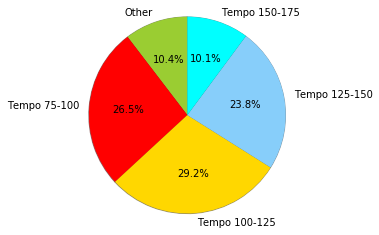

In [25]:
#pie chart
#other includes "Tempo<=25 @ .265781%", "Tempo 25-50 @.207641%", 
#"Tempo 50-75 @5.456811%", "Tempo 175-200 @3.887043", Tempo 200-225 @.564784%", "Tempo 225-250 @.008306%"

labels = ["Other", "Tempo 75-100", "Tempo 100-125", "Tempo 125-150", "Tempo 150-175"]
sizes = [10.390366, 26.478405, 29.186047, 23.795681, 10.149502]
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 
          'cyan','lightcoral','blue','pink', 'darkgreen', 
          'yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, radius=10)
ax1.axis('equal')

plt.savefig("Images/tempo-pie.png")
plt.show()